In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtr = pd.read_csv("/kaggle/input/ml-olympiad-smoking/train.csv")
dts = pd.read_csv("/kaggle/input/ml-olympiad-smoking/test.csv")
print(dtr.info())
print("")
print(dts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [3]:
X_tr = dtr.iloc[:, :-1].values
y_tr = dtr.iloc[:, -1].values
y_tr = y_tr.reshape(-1, 1)

X_ts = dts.iloc[:, :].values
predicts = [] # List of predicted values

print(y_tr)

[[1]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


In [4]:
print(dtr.shape)
print(dtr.columns)

(159256, 24)
Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


In [5]:
print(dtr.describe())

                  id            age     height(cm)     weight(kg)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean    79627.500000      44.306626     165.266929      67.143662   
std     45973.391572      11.842286       8.818970      12.586198   
min         0.000000      20.000000     135.000000      30.000000   
25%     39813.750000      40.000000     160.000000      60.000000   
50%     79627.500000      40.000000     165.000000      65.000000   
75%    119441.250000      55.000000     170.000000      75.000000   
max    159255.000000      85.000000     190.000000     130.000000   

           waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  159256.000000   159256.000000    159256.000000  159256.000000   
mean       83.001990        1.005798         1.000989       1.023974   
std         8.957937        0.402113         0.392299       0.152969   
min        51.000000        0.100000         0.100000       1.000000   
25%        77.0000

In [6]:
print(dtr.isnull().any())
print("")
print(dts.isnull().any())

id                     False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
dtype: bool

id                     False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
r

In [7]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.001, 0.1),
    'n_estimators': randint(100, 500),
    'gamma': uniform(0, 0.2),
    'subsample': uniform(0.6, 0.4), 
    'colsample_bytree': uniform(0.6, 0.4),  
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

In [8]:
xgb_regressor = xgb.XGBRegressor()

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_dist,
    n_iter=100, 
    cv=5,  # Increase the number of folds for cross-validation
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_tr, y_tr)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c17ffa5bee0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c17ffa5b6d0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c17ffa5b730>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c17ffa5bd30>},
                   random_state=42, scoring='neg_mean_squared_error')

In [9]:
# Get best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

xgb_regressor = xgb.XGBRegressor(**best_params)

xgb_regressor.fit(X_tr, y_tr)

Best Hyperparameters: {'colsample_bytree': 0.7679123425785106, 'gamma': 0.05124138871889161, 'learning_rate': 0.062151371086568055, 'max_depth': 6, 'n_estimators': 490, 'reg_alpha': 0.2507581473435998, 'reg_lambda': 0.3991475894833876, 'subsample': 0.8599855723111061}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7679123425785106, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.05124138871889161,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.062151371086568055,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=490, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = xgb_regressor.predict(X_ts)
print(y_pred)

[0.6025004  0.23727041 0.4491356  ... 0.47674754 0.09195772 0.06089527]


In [11]:
y_pred_flat = y_pred.flatten()
y_pred_flat

array([0.6025004 , 0.23727041, 0.4491356 , ..., 0.47674754, 0.09195772,
       0.06089527], dtype=float32)

# Graphical representation of the predicted values Vs features

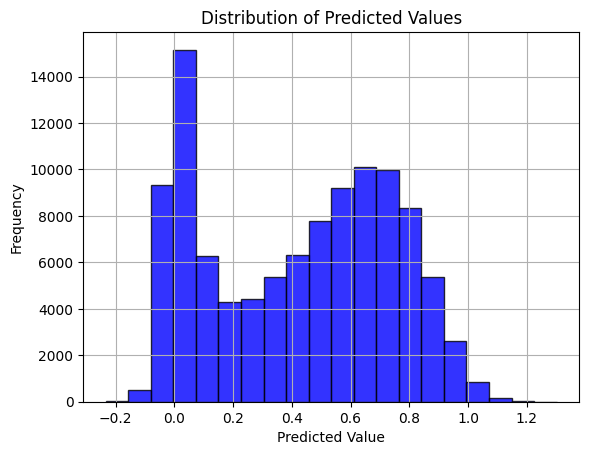

In [12]:
plt.hist(y_pred_flat, bins=20, color='blue', edgecolor='black', alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.grid(True)
plt.show() 

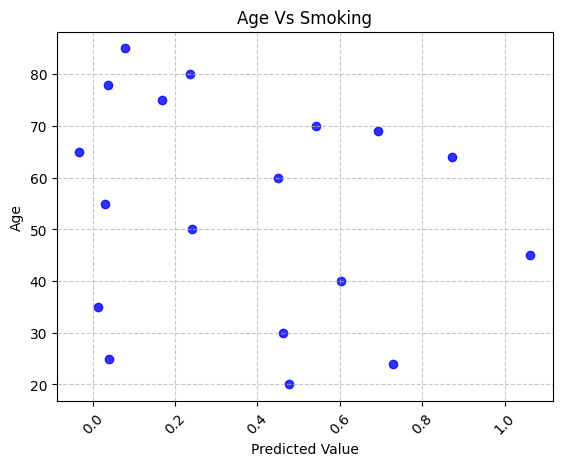

In [13]:
unique_age_values = dts['age'].unique()
predicted_values = y_pred_flat[0:len(unique_age_values)]

plt.scatter(predicted_values, unique_age_values, color='blue', alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Age')
plt.title('Age Vs Smoking')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

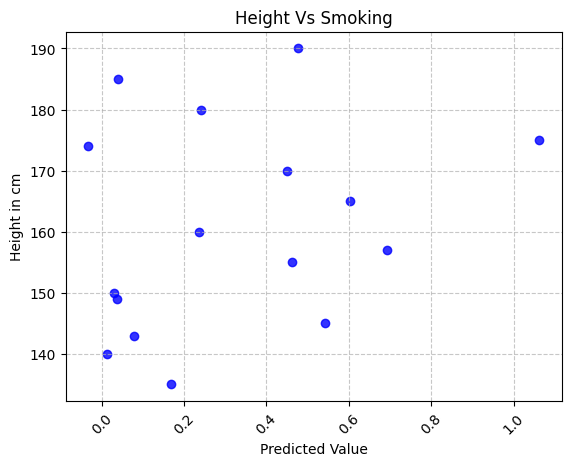

In [14]:
unique_height_values = dts['height(cm)'].unique()
predicted_values = y_pred_flat[0:len(unique_height_values)]

plt.scatter(predicted_values, unique_height_values, color='blue', alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Height in cm')
plt.title('Height Vs Smoking')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

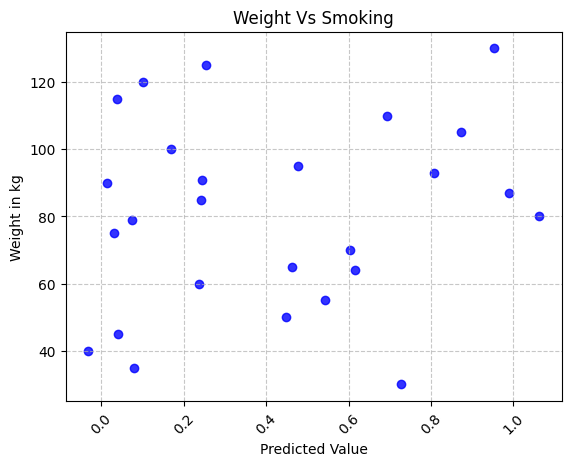

In [15]:
unique_weight_values = dts['weight(kg)'].unique()
predicted_values = y_pred_flat[0:len(unique_weight_values)]

plt.scatter(predicted_values, unique_weight_values, color='blue', alpha=0.8)
plt.xlabel('Predicted Value')
plt.ylabel('Weight in kg')
plt.title('Weight Vs Smoking')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

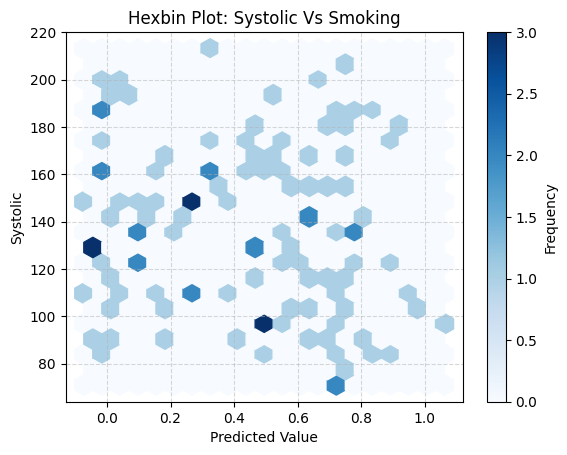

In [16]:
unique_systolic_values = dts['systolic'].unique()
predicted_values = y_pred_flat[0:len(unique_systolic_values)]

plt.hexbin(predicted_values, unique_systolic_values, gridsize=20, cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Systolic')
plt.title('Hexbin Plot: Systolic Vs Smoking')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Frequency')
plt.show()

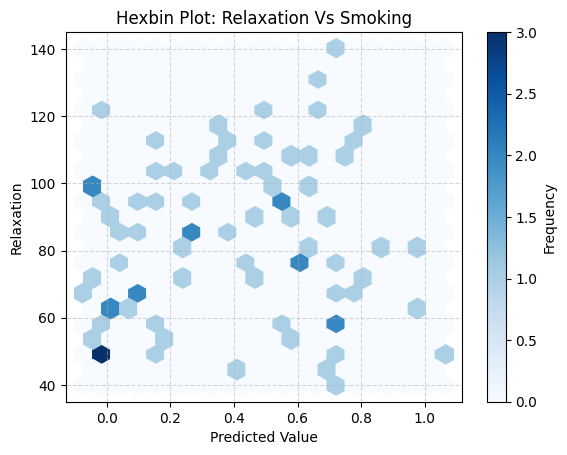

In [17]:
unique_relaxation_values = dts['relaxation'].unique()
predicted_values = y_pred_flat[0:len(unique_relaxation_values)]

plt.hexbin(predicted_values, unique_relaxation_values, gridsize=20, cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Relaxation')
plt.title('Hexbin Plot: Relaxation Vs Smoking')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Frequency')
plt.show()

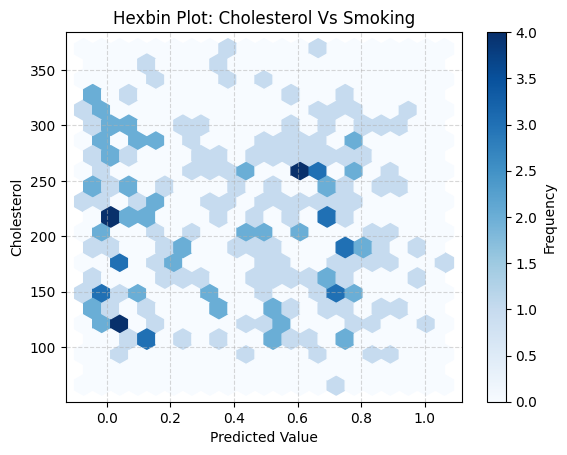

In [18]:
unique_Cholesterol_values = dts['Cholesterol'].unique()
predicted_values = y_pred_flat[0:len(unique_Cholesterol_values)]

plt.hexbin(predicted_values, unique_Cholesterol_values, gridsize=20, cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Cholesterol')
plt.title('Hexbin Plot: Cholesterol Vs Smoking')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Frequency')
plt.show()

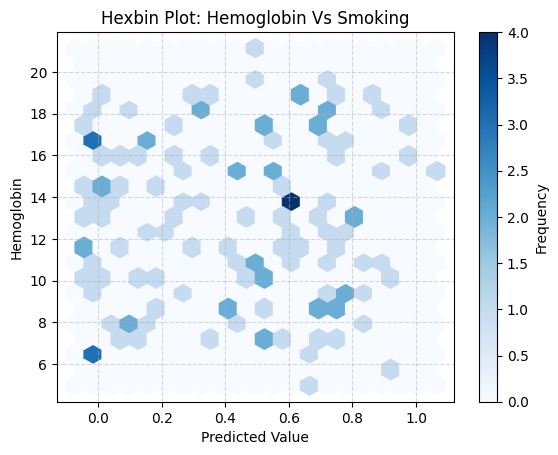

In [19]:
unique_hemoglobin_values = dts['hemoglobin'].unique()
predicted_values = y_pred_flat[0:len(unique_hemoglobin_values)]

plt.hexbin(predicted_values, unique_hemoglobin_values, gridsize=20, cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Hemoglobin')
plt.title('Hexbin Plot: Hemoglobin Vs Smoking')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Frequency')
plt.show()

**Input the result into sample_submission.csv**

In [20]:
import os
import csv

directory = '/kaggle/working/sdatatoedit'
os.makedirs(directory, exist_ok=True)

file_path = os.path.join(directory, 'sample_submission.csv')

# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w', newline='') as file:
        # Write a header or initial data if needed
        writer = csv.writer(file)
        writer.writerow(['id', 'smoking'])  # Example header
        
# Now the file should exist, so you can proceed with writing to it
with open(file_path, 'a', newline='') as file:
    writer = csv.writer(file)
    data_to_insert = y_pred
    for value in data_to_insert:
        writer.writerow([value])
len(data_to_insert)

106171